In [1]:
import pandas as pd

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv ("https://raw.githubusercontent.com/kmschaffer/CUNYDataAnalytics/main/NYPD_Arrest_Data__Year_to_Date_.csv")

In [4]:
df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,234233843,09/29/2021,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,B,42,0,25-44,M,BLACK,1009231,240290,40.826189,-73.909738,POINT (-73.90973778899996 40.82618898100003)
1,234129823,09/27/2021,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,K,77,0,25-44,M,BLACK,1003606,185050,40.674583,-73.930222,POINT (-73.93022154099998 40.67458330800008)
2,234040747,09/25/2021,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200501,F,Q,101,0,25-44,M,BLACK,1049232,159210,40.603441,-73.765986,POINT (-73.76598558899997 40.60344094100003)
3,234047720,09/25/2021,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,B,44,0,25-44,M,BLACK,1006537,244511,40.837782,-73.919458,POINT (-73.91945797099999 40.83778161800007)
4,234042526,09/25/2021,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,B,44,0,25-44,M,BLACK,1007418,243859,40.835990,-73.916276,POINT (-73.91627635999998 40.83598980000005)


In [5]:
df.tail()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
115294,222689440,01/06/2021,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200501,F,Q,102,0,18-24,M,ASIAN / PACIFIC ISLANDER,1031076,193779,40.698440,-73.831130,POINT (-73.83112953899997 40.69843969400005)
115295,222626401,01/05/2021,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200502,F,B,49,0,25-44,M,BLACK HISPANIC,1027430,251105,40.855803,-73.843910,POINT (-73.84390995399998 40.85580274300003)
115296,222477062,01/01/2021,922.0,"TRAFFIC,UNCLASSIFIED MISDEMEAN",348.0,VEHICLE AND TRAFFIC LAWS,VTL0511001,M,B,50,0,25-44,M,WHITE HISPANIC,1011047,256269,40.870041,-73.903112,POINT (-73.90311219699998 40.870041281000056)
115297,222728174,01/07/2021,339.0,"LARCENY,PETIT FROM OPEN AREAS,",341.0,PETIT LARCENY,PL 1552500,M,Q,114,0,25-44,M,WHITE HISPANIC,1007694,219657,40.769561,-73.915363,POINT (-73.91536344699995 40.76956124200007)
115298,222535613,01/03/2021,792.0,WEAPONS POSSESSION 1 & 2,118.0,DANGEROUS WEAPONS,PL 265031B,F,K,67,0,25-44,M,BLACK,1000054,173952,40.644129,-73.943053,POINT (-73.94305278599995 40.64412879400004)


In [6]:
df.columns

Index(['ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC',
       'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT',
       'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'X_COORD_CD',
       'Y_COORD_CD', 'Latitude', 'Longitude', 'New Georeferenced Column'],
      dtype='object')

In [7]:
df.shape

(115299, 19)

In [8]:
df.dtypes

ARREST_KEY                    int64
ARREST_DATE                  object
PD_CD                       float64
PD_DESC                      object
KY_CD                       float64
OFNS_DESC                    object
LAW_CODE                     object
LAW_CAT_CD                   object
ARREST_BORO                  object
ARREST_PRECINCT               int64
JURISDICTION_CODE             int64
AGE_GROUP                    object
PERP_SEX                     object
PERP_RACE                    object
X_COORD_CD                    int64
Y_COORD_CD                    int64
Latitude                    float64
Longitude                   float64
New Georeferenced Column     object
dtype: object

In [9]:
df.count()

ARREST_KEY                  115299
ARREST_DATE                 115299
PD_CD                       115278
PD_DESC                     115238
KY_CD                       115238
OFNS_DESC                   115238
LAW_CODE                    115299
LAW_CAT_CD                  114221
ARREST_BORO                 115299
ARREST_PRECINCT             115299
JURISDICTION_CODE           115299
AGE_GROUP                   115299
PERP_SEX                    115299
PERP_RACE                   115299
X_COORD_CD                  115299
Y_COORD_CD                  115299
Latitude                    115299
Longitude                   115299
New Georeferenced Column    115299
dtype: int64

In [10]:
drop_cols=["PD_CD", "PD_DESC", "KY_CD", "OFNS_DESC", "LAW_CODE", "LAW_CAT_CD","X_COORD_CD", "Y_COORD_CD", "Latitude", "Longitude", "New Georeferenced Column"]

In [11]:
df.drop(drop_cols, inplace = True, axis=1)

In [12]:
df.groupby("ARREST_BORO").count()

,ARREST_KEY,ARREST_DATE,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE
ARREST_BORO,,,,,,,
B,25312,25312,25312,25312,25312,25312,25312
K,31004,31004,31004,31004,31004,31004,31004
M,28948,28948,28948,28948,28948,28948,28948
Q,24654,24654,24654,24654,24654,24654,24654
S,5381,5381,5381,5381,5381,5381,5381


In [13]:
df['ARREST_BORO'].replace({"B": "Bronx", "K": "Brooklyn", "M": "Manhattan", "Q": "Queens", "S": "Staten Island"}, inplace=True)

In [14]:
df.head()

,ARREST_KEY,ARREST_DATE,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE
0,234233843,09/29/2021,Bronx,42,0,25-44,M,BLACK
1,234129823,09/27/2021,Brooklyn,77,0,25-44,M,BLACK
2,234040747,09/25/2021,Queens,101,0,25-44,M,BLACK
3,234047720,09/25/2021,Bronx,44,0,25-44,M,BLACK
4,234042526,09/25/2021,Bronx,44,0,25-44,M,BLACK


In [15]:
df.groupby("JURISDICTION_CODE").count()

,ARREST_KEY,ARREST_DATE,ARREST_BORO,ARREST_PRECINCT,AGE_GROUP,PERP_SEX,PERP_RACE
JURISDICTION_CODE,,,,,,,
0,105588,105588,105588,105588,105588,105588,105588
1,3162,3162,3162,3162,3162,3162,3162
2,3803,3803,3803,3803,3803,3803,3803
3,1034,1034,1034,1034,1034,1034,1034
4,69,69,69,69,69,69,69
6,10,10,10,10,10,10,10
7,83,83,83,83,83,83,83
8,1,1,1,1,1,1,1
9,1,1,1,1,1,1,1


In [16]:
105588/115299
#105588 is the number of arrests by Jurisdiction code 0 (Patrol).  Since over 90% of the arrests are by patrol, I will create a new df just for Patrol arrests.

0.9157755054250254

In [31]:
df.head()

,ARREST_KEY,ARREST_DATE,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,Non Patrol Arrests
0,234233843,09/29/2021,Bronx,42,0,25-44,M,BLACK,False
1,234129823,09/27/2021,Brooklyn,77,0,25-44,M,BLACK,False
2,234040747,09/25/2021,Queens,101,0,25-44,M,BLACK,False
3,234047720,09/25/2021,Bronx,44,0,25-44,M,BLACK,False
4,234042526,09/25/2021,Bronx,44,0,25-44,M,BLACK,False


In [17]:
df2 = df[df["JURISDICTION_CODE"] != 0]

In [18]:
df2.count

<bound method DataFrame.count of         ARREST_KEY ARREST_DATE ARREST_BORO  ...  AGE_GROUP  PERP_SEX       PERP_RACE
20       232272176  08/15/2021    Brooklyn  ...      45-64         M           BLACK
34       230213160  06/29/2021      Queens  ...      45-64         M           BLACK
46       227073285  04/18/2021      Queens  ...      25-44         F           BLACK
48       226733135  04/09/2021       Bronx  ...      25-44         M           BLACK
58       225959352  03/22/2021    Brooklyn  ...      25-44         M           BLACK
...            ...         ...         ...  ...        ...       ...             ...
115252   222770818  01/07/2021    Brooklyn  ...      25-44         M  BLACK HISPANIC
115254   222588858  01/04/2021      Queens  ...      25-44         M  BLACK HISPANIC
115255   222521106  01/02/2021       Bronx  ...      18-24         M           BLACK
115280   222694034  01/06/2021    Brooklyn  ...      25-44         M           BLACK
115285   222610657  01/05/2021  

In [19]:
115299-9711
#just double checking that the code worked; that df2 is all arrests that are not patrol arrests.

105588

In [20]:
dfp = df[df["JURISDICTION_CODE"] == 0]


In [21]:
dfp.count()

ARREST_KEY           105588
ARREST_DATE          105588
ARREST_BORO          105588
ARREST_PRECINCT      105588
JURISDICTION_CODE    105588
AGE_GROUP            105588
PERP_SEX             105588
PERP_RACE            105588
dtype: int64

In [22]:
#Research question:  How do the patrol arrests compare to all the other arrests combined when looking at borough?  

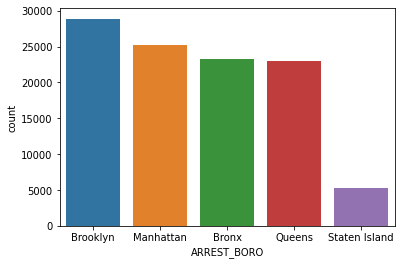

In [23]:
sns.countplot(x="ARREST_BORO", data=dfp, order = dfp["ARREST_BORO"].value_counts().index)

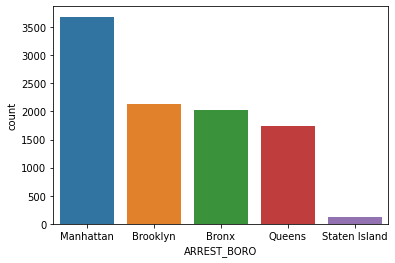

In [24]:
sns.countplot(x="ARREST_BORO", data=df2, order = df2["ARREST_BORO"].value_counts().index)

**I wanted to see what the percentage of arrests by borough was for each dataframe.  The below charats still have the count, but the number above each column has the percentage.**

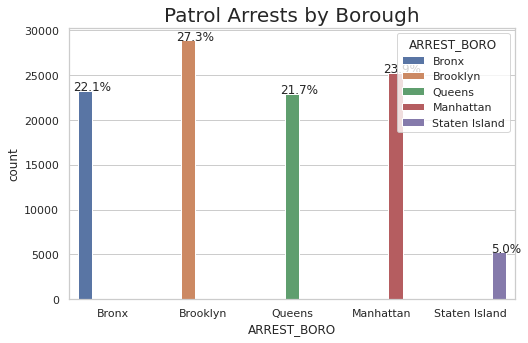

In [26]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(dfp))
ax = sns.countplot(x="ARREST_BORO", hue="ARREST_BORO", data=dfp)
plt.title('Patrol Arrests by Borough', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

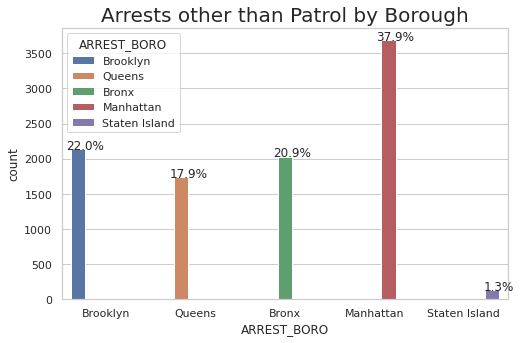

In [27]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(df2))
ax = sns.countplot(x="ARREST_BORO", hue="ARREST_BORO", data=df2)
plt.title('Arrests other than Patrol by Borough', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

**Conclusion:  Brooklyn had a higher percentage of patrol arrests, though not much higher than Manhattan, Bronx and Queens. For all other arrests, Manhattan had a much higher percentage of arrests, followed by Brooklyn, Bronx, and Queens, with a much smaller percentage of arrests in Staten Island.**